In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import ydf
from keras.applications import MobileNetV2 # Using a lightweight model suitable for 64x64 images


from PIL import Image

In [ ]:
bad_images = []
for subdir, _, files in os.walk("PetImages/"):
    for file in files:
        if file.lower().endswith(('.jpg')):
            img_path = os.path.join(subdir, file)
            try:
                with warnings.catch_warnings():
                        # handle userwarnings as errors with warnings package
                        warnings.simplefilter('error', UserWarning)
                        img = Image.open(img_path)
                        img.verify()  # Check if image is corrupted
            except:
                print('oops')
                bad_images.append(img_path)

print("Corrupted images found:", len(bad_images))
print(bad_images) #['PetImages/Cat\\666.jpg', 'PetImages/Dog\\11702.jpg'] ['PetImages/Dog\\9041.jpg']

oops
Corrupted images found: 1
['PetImages/Dog\\9041.jpg']


In [8]:
image_folder = "PetImages"
subfolders = ["Cat", "Dog"]
bad_images = []

print("Starting TensorFlow-based image verification...")

for subfolder in subfolders:
    folder_path = os.path.join(image_folder, subfolder)

    if not os.path.exists(folder_path):
        print(f"Directory not found: {folder_path}. Skipping.")
        continue

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # We need to use a try-except block here
        try:
            # Read the raw file data
            raw_image_data = tf.io.read_file(file_path)
            
            # Attempt to decode it using TensorFlow's engine
            # This is the same operation that fails during training
            tf.io.decode_image(raw_image_data)
            
        except tf.errors.InvalidArgumentError:
            # This is the specific error we are looking for!
            print(f"Corrupt file found (TF): {file_path}")
            bad_images.append(file_path)
        except Exception as e:
            # Catch any other potential errors, e.g., file not readable
            print(f"An unexpected error occurred for file {file_path}: {e}")
            bad_images.append(file_path)

print("\n---------------------------------")
print(f"Total corrupted or problematic images found: {len(bad_images)}")
print(bad_images)

# --- Optional: Automatically delete the bad files ---
# Uncomment the following lines to delete the files found
print("\nDeleting corrupted files...")
for fpath in bad_images:
    try:
        os.remove(fpath)
        print(f"Deleted: {fpath}")
    except OSError as e:
        print(f"Error deleting {fpath}: {e}")
print("Deletion complete.")

Starting TensorFlow-based image verification...
Corrupt file found (TF): PetImages\Cat\10404.jpg
Corrupt file found (TF): PetImages\Cat\4351.jpg
Corrupt file found (TF): PetImages\Cat\Thumbs.db
Corrupt file found (TF): PetImages\Dog\11233.jpg
Corrupt file found (TF): PetImages\Dog\11912.jpg
Corrupt file found (TF): PetImages\Dog\2317.jpg
Corrupt file found (TF): PetImages\Dog\2494.jpg
Corrupt file found (TF): PetImages\Dog\9500.jpg
Corrupt file found (TF): PetImages\Dog\Thumbs.db

---------------------------------
Total corrupted or problematic images found: 9
['PetImages\\Cat\\10404.jpg', 'PetImages\\Cat\\4351.jpg', 'PetImages\\Cat\\Thumbs.db', 'PetImages\\Dog\\11233.jpg', 'PetImages\\Dog\\11912.jpg', 'PetImages\\Dog\\2317.jpg', 'PetImages\\Dog\\2494.jpg', 'PetImages\\Dog\\9500.jpg', 'PetImages\\Dog\\Thumbs.db']

Deleting corrupted files...
Deleted: PetImages\Cat\10404.jpg
Deleted: PetImages\Cat\4351.jpg
Deleted: PetImages\Cat\Thumbs.db
Deleted: PetImages\Dog\11233.jpg
Deleted: PetIma

In [9]:
image_folder = "PetImages/"
img_size = (64, 64)
batch_size = 32

# Create a training dataset directly from the directory
# It will automatically infer class labels from the folder names
train_dataset = tf.keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,  # Use 20% of the images for validation
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Create a validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Get class names (e.g., ['Cat', 'Dog'])
class_names = train_dataset.class_names
print("Class names found:", class_names)

# Normalize the pixel values to be between 0 and 1
# normalization_layer = tf.keras.layers.Rescaling(1./255)
# train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
# validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 24990 files belonging to 2 classes.
Using 19992 files for training.
Found 24990 files belonging to 2 classes.
Using 4998 files for validation.
Class names found: ['Cat', 'Dog']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.125..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.0078125..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.7832031..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.95312].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.65625..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.17578125..252.50781].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.061523438..225.22388].
Clipping input da

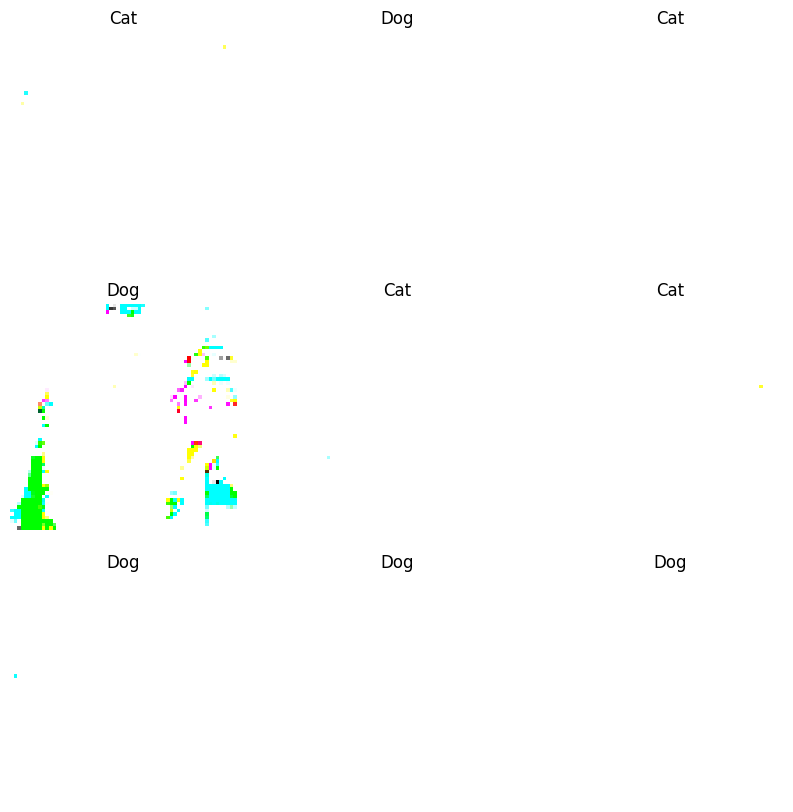

In [10]:
plt.figure(figsize=(10, 10))

# Take one batch from the dataset
# A batch contains a tensor of images and a tensor of their corresponding labels
for images, labels in train_dataset.take(1):
  # `images` is a batch of images (e.g., 32 images of shape 64x64x3)
  # `labels` is a batch of labels (e.g., 32 integers from 0 to n_classes-1)
  
  # Loop through the first 9 images in the batch
  for i in range(9):
    # Create a subplot for each image
    ax = plt.subplot(3, 3, i + 1)
    
    # Display the image
    # Note: Keras reads images as tf.Tensor, matplotlib expects NumPy arrays.
    # We also expect pixel values to be in the range [0, 1] for floating point images.
    # If you haven't normalized yet, you'd do images[i].numpy().astype("uint8")
    plt.imshow(images[i].numpy().astype("float32"))
    
    # Get the corresponding label name from the class_names list
    label_name = class_names[labels[i]]
    plt.title(label_name)
    
    # Hide the axes
    plt.axis("off")

# Display the plot
plt.show()

In [11]:
feature_extractor = MobileNetV2(
    weights='imagenet',
    include_top=False,        # Exclude the final classification layer
    pooling='avg',            # Average the features into a single vector per image
    input_shape=(*img_size, 3)
)

# --- 3. Define a Function to Extract Features from a Dataset ---
def extract_features(dataset, extractor_model):
    """Iterates through a tf.data.Dataset, extracts features, and returns them as NumPy arrays."""
    all_features = []
    all_labels = []

    print("Extracting features...")
    # Iterate through each batch of images and labels in the dataset
    for images, labels in dataset:
        # Use the specific preprocessing function for MobileNetV2
        preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(images)
        
        # Get feature vectors from the extractor model
        features = extractor_model.predict(preprocessed_images, verbose=0)
        
        # Store the results from the batch
        all_features.append(features)
        all_labels.append(labels.numpy())

    # Concatenate all batches into single NumPy arrays
    return np.concatenate(all_features), np.concatenate(all_labels)

# --- 4. Process Both Datasets ---
train_features, train_labels = extract_features(train_dataset, feature_extractor)
val_features, val_labels = extract_features(validation_dataset, feature_extractor)

print(f"\nShape of training features: {train_features.shape}")
print(f"Shape of validation features: {val_features.shape}")

# --- 5. Convert to Pandas DataFrames for YDF ---
# Create column names for the features
feature_columns = [f'feature_{i}' for i in range(train_features.shape[1])]

# Create the training DataFrame
train_df = pd.DataFrame(train_features, columns=feature_columns)
train_df['label'] = train_labels

# Create the validation DataFrame (which we'll use for testing)
test_df = pd.DataFrame(val_features, columns=feature_columns)
test_df['label'] = val_labels

print("\nTraining DataFrame head:")
print(train_df.head())

# --- 6. Train and Evaluate the YDF Random Forest Model ---
print("\nTraining YDF Random Forest model...")

# Define the model. YDF will automatically detect the classification task.
rf_model = ydf.RandomForestLearner(label="label").train(train_df)

# Evaluate the model's performance on the validation data
print("\nEvaluating model performance...")
evaluation = rf_model.evaluate(test_df)

print("\nEvaluation Report:")
print(evaluation)

accuracy = evaluation.accuracy
print(f"\nModel Accuracy on Validation Set: {accuracy * 100:.2f}%")

C:\Users\ligma\AppData\Local\Temp\ipykernel_59492\358037125.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  feature_extractor = MobileNetV2(


Extracting features...
Extracting features...

Shape of training features: (19992, 1280)
Shape of validation features: (4998, 1280)

Training DataFrame head:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.000000   0.000000   0.013471   1.711313   0.000000   0.000000   
1   0.000000   0.211355   1.396279   1.236521   0.175555   0.000000   
2   0.000000   0.462304   0.000000   0.923774   6.000000   0.000000   
3   1.537643   0.000000   0.000000   0.000000   0.000000   0.000000   
4   0.132699   0.000000   3.005672   0.000000   0.000000   2.306738   

   feature_6  feature_7  feature_8  feature_9  ...  feature_1271  \
0   0.000000   0.000000   0.000000   0.034662  ...      0.000000   
1   0.000000   0.000000   6.000000   0.000000  ...      0.010942   
2   1.527553   0.881599   5.669243   2.504699  ...      0.000000   
3   0.000000   0.000000   0.000000   0.000000  ...      0.194643   
4   6.000000   0.458991   5.774117   0.000000  ...      0.000000   

   fea